In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\96894\Desktop\Projects\Machine_learning\Decision_tree\IRIS.csv'

In [3]:
df=pd.read_csv(file_path)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Exploring and Analysing Data

df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
print(f"Minimum value: \n{df.min()}")

Minimum value: 
sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object


In [13]:
print(f"Maximum value: \n{df.max()}")

Maximum value: 
sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object


In [14]:
print(f"Average value: \n{df.mean(numeric_only=True)}")

Average value: 
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [17]:
# Data Preprocessing-To convert the dataset into categorical variable

from sklearn.preprocessing import LabelEncoder

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
le=LabelEncoder()

In [20]:
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
# spliting the data data into dependent and independent data

x = df.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: object

In [24]:
 # spliting the dataset into train and test split

from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=50)

In [26]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [27]:
X_train.shape

(120, 4)

In [28]:
Y_train.shape

(120,)

In [29]:
# model building

from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()

In [31]:
print(Y_train.dtypes)
print(Y_train.unique())


# Convert target variable to integer type
Y_train = Y_train.astype(int)

object
[2 1 0]


In [32]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
# Comparison between actual & predicted output

y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [34]:
Y_test = Y_test.astype(int)
Y_test = np.array(Y_test)
Y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [35]:
# accuracy of decision tree model

from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_pred,Y_test)

0.9666666666666667

In [37]:
# confusion matrics for decision tree model

from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_pred,Y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]], dtype=int64)

In [39]:
# classification report of decision tree model

from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [40]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [41]:
# decision tree visualization

from sklearn import tree

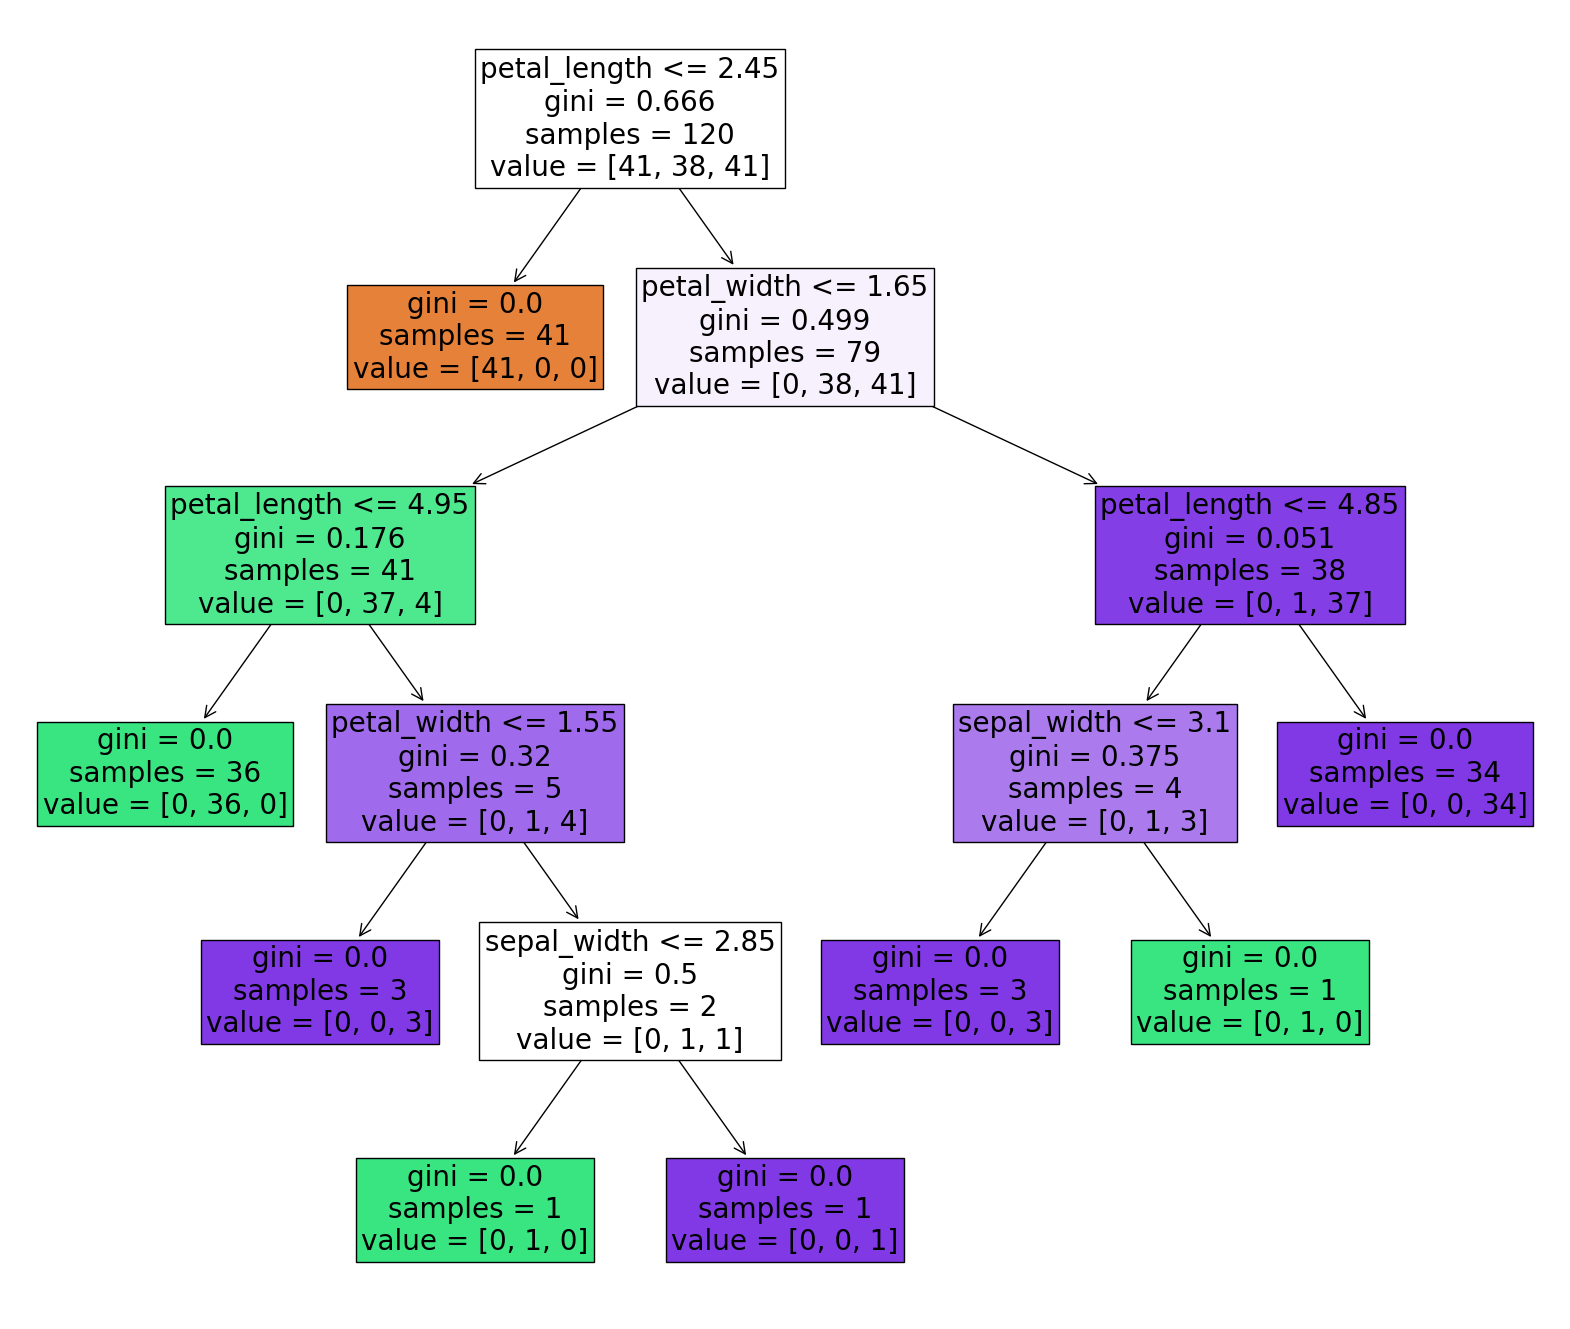

In [43]:
plt.figure(figsize=(20,17))
dtt=tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=20)